# Keras Tutorial # 01

## Shallow Convolutional Neural Network

Introduction

In this tutorial we will implement a shallow convolutional neural network with tensorflow as backend using the CIFAR-10 dataset. This dataset is about 163MB and will be downloaded automatically if it is not located in the default path. The size of individual image in this dataset is 32x32x3 constituting 3072 pixels for an image in the dataset.

Construction of convolutional layers is similar to using lego blocks. It needs systematic construction as well caudaver based approach to fully understand which of these layers will be useful to a particular data driven problem.

More details about the CIFAR-10 dataset can be found in the following link. https://www.cs.toronto.edu/~kriz/cifar.html

We summarize the construction of the deep learning models in keras as follows:

1. Define your model.
2. Compile your model.
3. Fit your model.
4. Make prediction on the validation data.
5. Investigate the training using tools such as curves and confusion matrix.



In [1]:
#Import the required packages
from keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

#sklearn packages for evaluation metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [2]:
import keras 
from keras import backend as K
print(K)

<module 'keras.backend' from '/home/adminpnarayanan/anaconda2/envs/dl4keras/lib/python3.5/site-packages/keras/backend/__init__.py'>


In [3]:
import keras
print(keras.__version__)

2.0.8


In [4]:
class ShallowCNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (width,height, depth)
            
        # first CONV => RELU       
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        
        # first CONV => RELU => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        
        # first (and only) set of FC => RELU => Dropout layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        # return the constructed network architecture
        return model
    

In [5]:
print("[INFO] loading CIFAR10 data")

((trainX,trainY),(testX,testY))=cifar10.load_data()

trainX=trainX.astype("float")/255.0
testX=testX.astype("float")/255.0                    

print("Training dataset size: \t \t{}".format(trainX.shape))
print("Test dataset size: \t \t{}".format(testX.shape))

np.random.seed(123)

[INFO] loading CIFAR10 data
Training dataset size: 	 	(50000, 32, 32, 3)
Training dataset size: 	 	(10000, 32, 32, 3)


In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(trainY, 10)
Y_test = np_utils.to_categorical(testY, 10)

labelNames=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


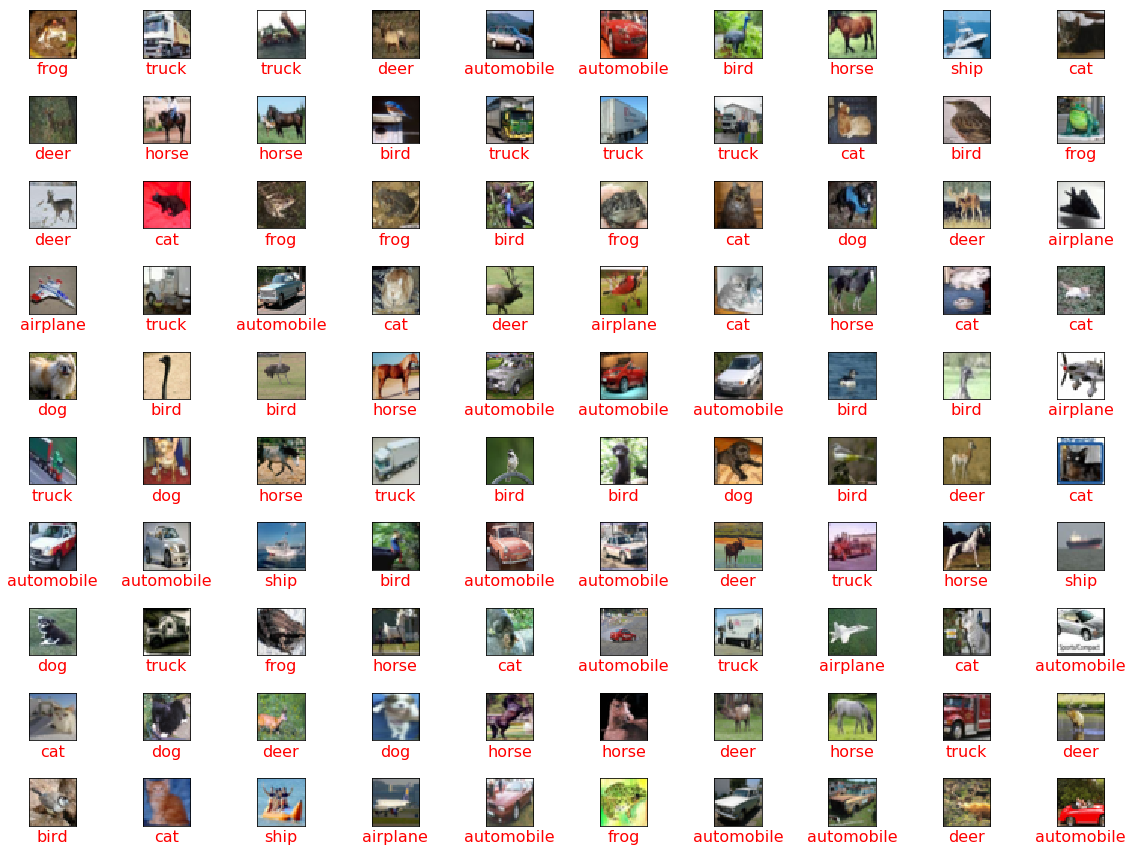

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_images(images,class_label):
    fig,axes=plt.subplots(10,10,figsize=(20,15))
    fig.subplots_adjust(hspace=0.8,wspace=0.3)
    
    for i,ax in enumerate(axes.flat):
        ax.imshow(trainX[i])
        xlab=labelNames[int(trainY[i])]
        ax.set_xlabel(xlab,fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.xaxis.label.set_color('red')
        
#Visualize the training images       
images=trainX[0:100]
cls=trainY[0:100]
plot_images(images,cls)
    
 

In [8]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 10, momentum=0.9, nesterov=True)
model = ShallowCNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
nb_epoch=10
no_epochs=nb_epoch

[INFO] compiling model...


We use the Stochastic gradient descent (SGD) with learning rate=0.01 and then slowly decay it over 10 epochs. We apply a momentum of 0.9 and indicate that Nesterov acceleration for our training

In [9]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, Y_train, validation_data=(testX, Y_test),batch_size=64, epochs=no_epochs,verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 207s - loss: 1.6157 - acc: 0.4165 - val_loss: 1.2883 - val_acc: 0.5381
Epoch 2/10
50000/50000 [==============================] - 213s - loss: 1.2183 - acc: 0.5629 - val_loss: 1.0795 - val_acc: 0.6165
Epoch 3/10
50000/50000 [==============================] - 210s - loss: 1.0483 - acc: 0.6288 - val_loss: 1.0090 - val_acc: 0.6422
Epoch 4/10
50000/50000 [==============================] - 212s - loss: 0.9356 - acc: 0.6695 - val_loss: 0.9473 - val_acc: 0.6692
Epoch 5/10
50000/50000 [==============================] - 216s - loss: 0.8492 - acc: 0.7011 - val_loss: 0.9005 - val_acc: 0.6816
Epoch 6/10
50000/50000 [==============================] - 217s - loss: 0.7741 - acc: 0.7259 - val_loss: 0.8821 - val_acc: 0.6905
Epoch 7/10
50000/50000 [==============================] - 216s - loss: 0.7127 - acc: 0.7511 - val_loss: 0.8528 - val_acc: 0.7029
Epoch 8/10
50000/500

In [10]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))



[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       1.00      0.11      0.19     10000
 automobile       0.00      0.00      0.00         0
       bird       0.00      0.00      0.00         0
        cat       0.00      0.00      0.00         0
       deer       0.00      0.00      0.00         0
        dog       0.00      0.00      0.00         0
       frog       0.00      0.00      0.00         0
      horse       0.00      0.00      0.00         0
       ship       0.00      0.00      0.00         0
      truck       0.00      0.00      0.00         0

avg / total       1.00      0.11      0.19     10000



/home/adminpnarayanan/anaconda2/envs/dl4keras/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [11]:
%matplotlib inline

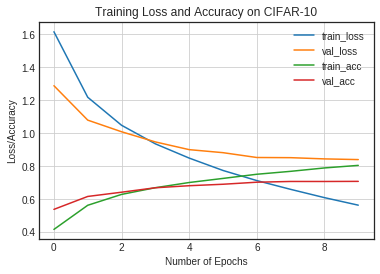

In [12]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, no_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_epochs), H.history["val_acc"], label="val_acc")
plt.grid(True)
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()


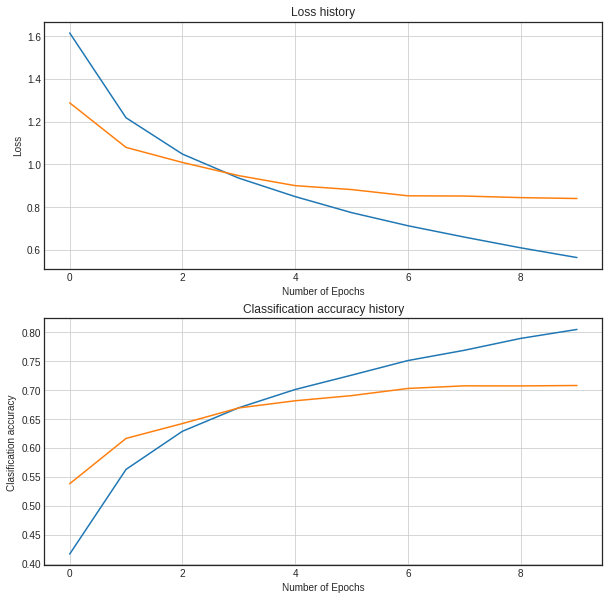

In [13]:
# Plot the loss function and train / validation accuracies
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, no_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_epochs), H.history["val_loss"], label="val_loss")
plt.title('Loss history')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(0, no_epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_epochs), H.history["val_acc"], label="val_acc")
plt.title('Classification accuracy history')
plt.xlabel('Number of Epochs')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.show()


# Exercises

Here I have few suggestions that might improve our understanding of the convolution filters. It is quite important to learn how to fine tune the network to the data given to us.

1. Try running the network for more epochs. Plot the accuracy and loss to see if the results get better.

2. Tuning Hyperparameters is quite essential and it is a learning curve about the data.

3. Change the Optimizer. (Try optimizers such as RMSProp,Adagrad,Adadelta and Adam). SGD is still the most widely 
   used optimizer within the deep learning community.
   
4. Change the learning rate of the optimizer.

5. Pay attention to your Training and validation curves.

6. For experimental purposes, try sigmoid and tanh activation functions to better understand the rationale of relu
   activation function.

Becoming familiar with the given optimization algorithm is similar to mastering how to drive a car. You would drive better than other people's car because you've spent so much time drivint it; so you are aware of the car and its intricacies.


Caudaver the network and combine the different lego block in a systematic manner and run the network and inspect the respective plots. Even a seasoned practitioner will run 10's and 100's of experiments, along the way and eventually arrive at a solution.
